# Support vector machines

* Analayze the data, are there any abnormalities?
* Plot the data, is it possible to create a good classification?
* Create a hyperplane
* Create a 3d-model. 

Importing neccesary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing dataset

In [2]:
random_data_1 = pd.read_csv('../../Datasets/random_data.csv')
random_data_2 = pd.read_csv('../../Datasets/random_data_2.csv')
random_data_3 = pd.read_csv('../../Datasets/random_data_3.csv')

# Dataset analysis
<b> Size </b>

In [3]:
print(f"Dataset 1: {random_data_1.shape}")
print(f"Dataset 2: {random_data_2.shape}")
print(f"Dataset 3: {random_data_3.shape}")

Dataset 1: (1000, 3)
Dataset 2: (1000, 3)
Dataset 3: (1000, 4)


<b>Overview</b>

In [4]:
print(random_data_1.head())
print(random_data_2.head())
print(random_data_3.head())

   feature_1  feature_2  target
0   0.811586   1.977330       1
1  -0.283428  -1.368891       0
2  -0.281272   0.858368       1
3   0.617176   1.293528       1
4   1.080526   0.815136       1
   feature_1  feature_2  target
0   0.811586   1.977330       1
1  -0.283428  -1.368891       0
2  -0.281272   0.858368       1
3   0.617176   1.293528       1
4   1.080526   0.815136       1
   Unnamed: 0  feature_1  feature_2  target
0           0   0.811586   1.977330       1
1           1  -0.283428        NaN       0
2           2  -0.281272   0.858368       1
3           3   0.617176   1.293528       1
4           4   1.080526   0.815136       1


Since dataset 1 and 2 look similar in the output above an equal check is made to see whether the datasets are equal or not. The datasets are shown to not be equal.

In [5]:
equals12 = random_data_1.equals(random_data_2)
print(equals12)

False


### Finding any empty values in the datasets
Dataset 3 is shown to contain empty values

In [6]:
print(f"Contains empty values, dataset 1: {random_data_1.isnull().values.any()}")
print(f"Contains empty values, dataset 2: {random_data_2.isnull().values.any()}")
print(f"Contains empty values, dataset 3: {random_data_3.isnull().values.any()}")

Contains empty values, dataset 1: False
Contains empty values, dataset 2: False
Contains empty values, dataset 3: True


## Cleaning dataset 3:



By using np.where(pd.isnull(df)) the positions of the nullvalues can be found. The first value is the row number and the 2nd is the columns number, we can see that only information about the features are missing, not the target values.

The rows containing empty values are removed and the dataset is reduced down to 902rows of data. The kolumn "Unnamed:0" is used for index and is not needed in this case, it is also removed.

In [7]:
random_data_3 = pd.read_csv('../../Datasets/random_data_3.csv')
print(f"Amount of datapoints with nullvalues: {len(np.where(pd.isnull(random_data_3))[0])-1}")
print(np.where(pd.isnull(random_data_3)))
random_data_3 = random_data_3.dropna()
print(f"\nLingering nullvalues: {np.where(pd.isnull(random_data_3))}")

random_data_3 = random_data_3.drop(columns=['Unnamed: 0'])
print(f"\nCleaned dataset:\n {random_data_3}")

Amount of datapoints with nullvalues: 98
(array([  1,  32,  38,  43,  46,  53,  57,  70,  72,  86,  93,  95, 102,
       104, 115, 123, 144, 154, 156, 157, 159, 175, 222, 227, 227, 232,
       267, 268, 272, 276, 294, 295, 296, 304, 311, 317, 338, 352, 353,
       356, 367, 371, 388, 406, 411, 416, 439, 468, 469, 472, 479, 497,
       503, 507, 522, 533, 540, 553, 557, 561, 563, 580, 582, 600, 603,
       605, 619, 633, 641, 661, 662, 666, 668, 671, 672, 684, 688, 699,
       707, 756, 770, 781, 788, 798, 803, 824, 829, 842, 847, 852, 862,
       918, 926, 929, 939, 943, 962, 970, 986], dtype=int64), array([2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1], dtype=int64))

Lingering nullvalues: (array([], dtype=int64

# Overview of dataset 1

Feature_2 seems to be the decider of the result, positive values of feature_2 results in the target value 1 and feature 2 values below 0 results in target value 0.

Dataset 1 contains no duplicate values and has 1000 unique values

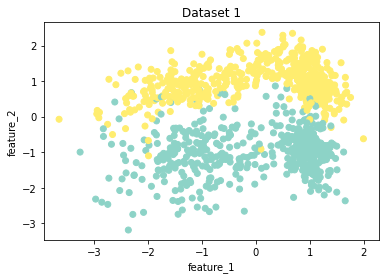

Are there duplicate values: False    1000
dtype: int64
Maximum value feature 1: 1.9926856708705003 feature 2: 2.372059505296922
Minimum value feature 1: -3.650544039779284 feature 2: -3.1879747895247466


In [8]:
random_data_1_f1 = random_data_1['feature_1']
random_data_1_f2 = random_data_1['feature_2']

# C = A sequence of numbers that are mapped to a certain set of colors, cmap is the color choice for these.

plt.scatter(random_data_1_f1,random_data_1_f2, c = random_data_1.target, cmap = "Set3")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.title("Dataset 1")
plt.show()

duplicates_1 = random_data_1.duplicated().value_counts()
print(f"Are there duplicate values: {duplicates_1}")

print(f"Maximum value feature 1: {random_data_1_f1.max()} feature 2: {random_data_1_f2.max()}")
print(f"Minimum value feature 1: {random_data_1_f1.min()} feature 2: {random_data_1_f2.min()}")


# Dataset 2

Dataset 2 contains 500 unique values and 500 duplicate values.

Feature_2 seems to best predict the target value.

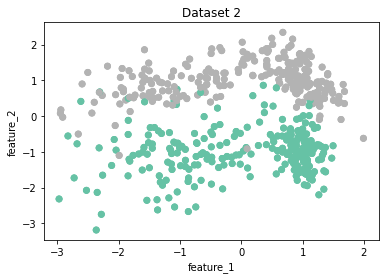

Are there duplicate values: False    500
True     500
dtype: int64
Maximum value feature 1: 1.9926856708705003 feature 2: 2.3447323315611164
Minimum value feature 1: -2.972555490940457 feature 2: -3.1879747895247466


In [9]:

random_data_2_f1 = random_data_2['feature_1']
random_data_2_f2 = random_data_2['feature_2']


plt.scatter(random_data_2_f1, random_data_2_f2, c = random_data_2.target, cmap = "Set2")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.title("Dataset 2")
plt.show()

duplicates_2 = random_data_2.duplicated().value_counts()
print(f"Are there duplicate values: {duplicates_2}")

print(f"Maximum value feature 1: {random_data_2_f1.max()} feature 2: {random_data_2_f2.max()}")
print(f"Minimum value feature 1: {random_data_2_f1.min()} feature 2: {random_data_2_f2.min()}")




# Dataset 3

No duplicated values are found in dataset 3. This dataset contains less values than dataset 1 since dataset 3 contained null values that have been removed.

Feature_2 seems to best predict the target value.

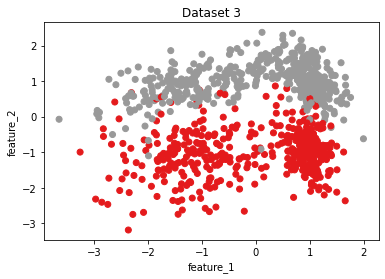

Are there duplicate values: False    902
dtype: int64
Maximum value feature 1: 1.9926856708705003 feature 2: 2.372059505296922
Minimum value feature 1: -3.650544039779284 feature 2: -3.1879747895247466


In [10]:
random_data_3_f1 = random_data_3['feature_1']
random_data_3_f2 = random_data_3['feature_2']


plt.scatter(random_data_3_f1, random_data_3_f2, c = random_data_3.target, cmap = "Set1")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.title("Dataset 3")
plt.show()

duplicates_3 = random_data_3.duplicated().value_counts()
print(f"Are there duplicate values: {duplicates_3}")

print(f"Maximum value feature 1: {random_data_3_f1.max()} feature 2: {random_data_3_f2.max()}")
print(f"Minimum value feature 1: {random_data_3_f1.min()} feature 2: {random_data_3_f2.min()}")

# Dataset 1 och dataset 3 looks very similar. Comparison between the two datasets



Combining the two datasets to find overlap between the two.

In [11]:
test = pd.concat([random_data_1, random_data_3])
test.duplicated().value_counts()

False    1009
True      893
dtype: int64

Dataset 1 has 1000 unique values och only 1009 unique values can be found after combining dataset 1 with dataset 3 this means that the two datasets are almost the exact same (with dataset 3 missing some data!)

Comparing the rows where dataset 3 is misssing data to the rows of dataset 1.

It is shown that the differences between the rows that are not equal are very minor, only a few decimal differences.

In [12]:
random_data_3_ = pd.read_csv('../../Datasets/random_data_3.csv')
random_data_3_ = random_data_3_.drop(columns=['Unnamed: 0'])
comparison = random_data_1.compare(random_data_3_)

#Getting the rows where dataset 3 has a values, i.e the empty rows in dataset 3 are not stored
unique_values_dataset_3 = comparison[ (comparison["feature_1"]["other"] <= random_data_3_['feature_1'].max()) | (comparison["feature_2"]["other"] <=  random_data_3_['feature_2'].max())]
print(unique_values_dataset_3)

    feature_1           feature_2          
         self     other      self     other
263 -1.830805 -1.830805       NaN       NaN
353  0.029061       NaN  1.802331  1.802331
597       NaN       NaN -1.838117 -1.838117
646 -2.326842 -2.326842       NaN       NaN
682 -1.938547 -1.938547       NaN       NaN
737       NaN       NaN -2.467161 -2.467161
761 -2.075665 -2.075665       NaN       NaN
837 -1.975588 -1.975588       NaN       NaN
872       NaN       NaN -1.859310 -1.859310
913 -1.900039 -1.900039       NaN       NaN


### Conclusion

Since dataset 2 contains only half the uniques values of dataset 1  and dataset 3 seems to be a damaged dataset 1 im choosing to work with <b> dataset 1</b>.


#### Max and min datapoints

In [13]:
feature_1_max_point = random_data_1.iloc[random_data_1['feature_1'].idxmax()]
feature_1_min_point = random_data_1.iloc[random_data_1['feature_1'].idxmin()]

feature_2_max_point = random_data_1.iloc[random_data_1['feature_2'].idxmax()]
feature_2_min_point = random_data_1.iloc[random_data_1['feature_2'].idxmin()]

print(f"\nFeature_1 max value datapoint:\n{feature_1_max_point}")
print(f"\nFeature_1 min value datapoint:\n{feature_1_min_point}")

print(f"\nFeature_2 max value datapoint:\n{feature_2_max_point}")
print(f"\nFeature_2 min value datapoint:\n{feature_2_min_point}")


Feature_1 max value datapoint:
feature_1    1.992686
feature_2   -0.621812
target       1.000000
Name: 457, dtype: float64

Feature_1 min value datapoint:
feature_1   -3.650544
feature_2   -0.072585
target       1.000000
Name: 632, dtype: float64

Feature_2 max value datapoint:
feature_1    0.112655
feature_2    2.372060
target       1.000000
Name: 809, dtype: float64

Feature_2 min value datapoint:
feature_1   -2.366361
feature_2   -3.187975
target       0.000000
Name: 347, dtype: float64


### Extremevalues plotted
The extremevalues are not far from the bulk of the datapoints, the only value that is far from the rest is the feature_1 minimum point: (-3.65,-0.07), therefore the extremevalues are kept in the dataset.

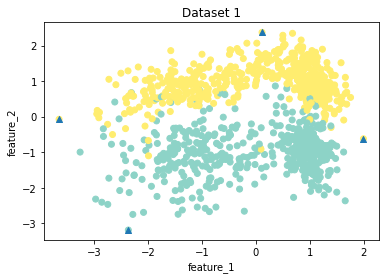

In [14]:
plt.scatter(random_data_1_f1,random_data_1_f2, c = random_data_1.target, cmap = "Set3")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.title("Dataset 1")
x_xtreme = [feature_1_max_point['feature_1'],feature_1_min_point['feature_1'],feature_2_max_point['feature_1'],feature_2_min_point['feature_1']]
y_xtreme = [feature_1_max_point['feature_2'],feature_1_min_point['feature_2'],feature_2_max_point['feature_2'],feature_2_min_point['feature_2']]
plt.scatter(x_xtreme,y_xtreme, marker = '^')
plt.show()

### SVM. Notes and testscore.


Support vectors are the points that affect the margin of each side of the hyperplane. By using "clf.support_vectors_" we can find the datapoints (98 in this case) that affect the hyperplane positioning.

When a linear kernel is used a testscore of 0.96 is produced. The testscore was the same for the kernel types Poly, rbf and linear. For kernel type sigmoid the testscore was a bit lower, 0.944.

The trainingscore was the best for kernel type "rbf". "rbf" was also identified as the best kernel when using GridSearchCV to go through the different combinations of kernels and settings for these

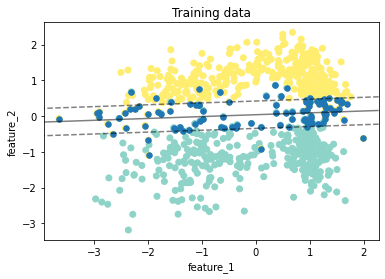

Amount of support vectors: 98, percentage support vectors out of all vectors = 0.131%
Trainscore: 0.9546666666666667
Testscore: 0.96


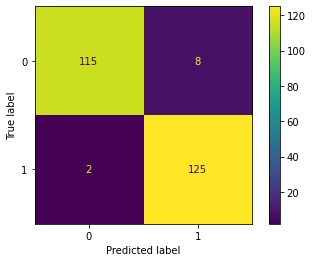

In [47]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X = random_data_1.drop(columns =['target'])
y = random_data_1['target']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.25, random_state = 11)

clf = svm.SVC(kernel = 'linear', C=1)
clf.fit(X_train,y_train)


plt.scatter(X_train["feature_1"], X_train["feature_2"], c = y_train, cmap = "Set3")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.title('Training data')
ax = plt.gca()


xlim = ax.get_xlim()
ylim = ax.get_ylim()

#xx will contain 50 values form xmin to xmax evenly spaced
#yy will contain 50 values form xmin to xmax evenly spaced
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)

#YY = [[Ymin, Ymin, Ymin .... x50times]
#      [...]
#      [Ymax, Ymax, Ymax .... x50times]]

#XX = [[Xmin, .... , Xmax]
#      [....X50Times.]
#      [Xmin, .... , Xmax]]
YY, XX = np.meshgrid(yy,xx)

#"flattens XX and YY to single row arrays and converts these to a 2500x2 array by transposing them"
xy = np.vstack([XX.ravel(),YY.ravel()]).T

z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, z, colors = 'k', levels = [-1,0,1],
          alpha = 0.5,
          linestyles = ['--','-','--'])

#Support vectors
ax.scatter(clf.support_vectors_[:,0],
          clf.support_vectors_[:,1], s=30, linewidth =1, facecolors = None)

plt.show()

part_SV = len(clf.support_vectors_)/len(X_train)

print(f"Amount of support vectors: {len(clf.support_vectors_)}, percentage support vectors out of all vectors = {part_SV:.3f}%")

print(f"Trainscore: {clf.score(X_train,y_train)}")
print(f"Testscore: {clf.score(X_test,y_test)}")
clf.coef_

predicted_values = clf.predict(X_test)

pred_cm = confusion_matrix(y_test, predicted_values)


cm_disp = ConfusionMatrixDisplay(pred_cm, display_labels = ['0','1'])

cm_disp.plot()

## Testing with other kernels
### Poly
Same testscore, but more datapoints are used as support vectors.

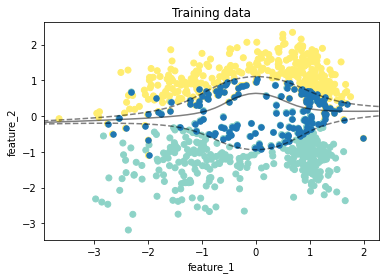

Amount of support vectors: 163, percentage support vectors out of all vectors = 0.217%
Testscore: 0.96
Trainscore: 0.96


In [46]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X = random_data_1.drop(columns =['target'])
y = random_data_1['target']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.25, random_state = 11)

clfpoly = svm.SVC(kernel = 'poly', C=1)
clfpoly.fit(X_train,y_train)

plt.scatter(X_train["feature_1"], X_train["feature_2"], c = y_train, cmap = "Set3")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.title('Training data')
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)

YY, XX = np.meshgrid(yy,xx)

xy = np.vstack([XX.ravel(),YY.ravel()]).T

z = clfpoly.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, z, colors = 'k', levels = [-1,0,1],
          alpha = 0.5,
          linestyles = ['--','-','--'])

#Support vectors
ax.scatter(clfpoly.support_vectors_[:,0],
          clfpoly.support_vectors_[:,1], s=30, linewidth =1, facecolors = None)

plt.show()

part_SV = len(clfpoly.support_vectors_)/len(X_train)

print(f"Amount of support vectors: {len(clfpoly.support_vectors_)}, percentage support vectors out of all vectors = {part_SV:.3f}%")

print(f"Testscore: {clfpoly.score(X_test,y_test)}")
print(f"Trainscore: {clfpoly.score(X_train,y_train)}")


## rbf 

Best trainscore but the same testscore as poly and linear

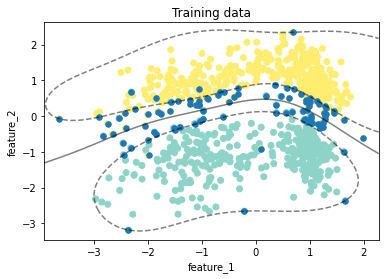

Amount of support vectors: 95, percentage support vectors out of all vectors = 0.127%
Testscore: 0.96
Trainscore: 0.9746666666666667


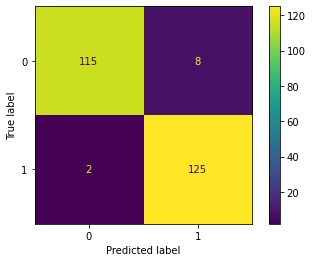

In [45]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X = random_data_1.drop(columns =['target'])
y = random_data_1['target']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.25, random_state = 11)

clfrbf = svm.SVC(kernel = 'rbf', C=1)
clfrbf.fit(X_train,y_train)

plt.scatter(X_train["feature_1"], X_train["feature_2"], c = y_train, cmap = "Set3")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.title('Training data')
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)

YY, XX = np.meshgrid(yy,xx)

xy = np.vstack([XX.ravel(),YY.ravel()]).T

z = clfrbf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, z, colors = 'k', levels = [-1,0,1],
          alpha = 0.5,
          linestyles = ['--','-','--'])

#Support vectors
ax.scatter(clfrbf.support_vectors_[:,0],
          clfrbf.support_vectors_[:,1], s=30, linewidth =1, facecolors = None)

plt.show()

part_SV = len(clfrbf.support_vectors_)/len(X_train)

print(f"Amount of support vectors: {len(clfrbf.support_vectors_)}, percentage support vectors out of all vectors = {part_SV:.3f}%")

print(f"Testscore: {clfrbf.score(X_test,y_test)}")
print(f"Trainscore: {clfrbf.score(X_train,y_train)}")

predicted_values = clfrbf.predict(X_test)

pred_cm = confusion_matrix(y_test, predicted_values)


cm_disp = ConfusionMatrixDisplay(pred_cm, display_labels = ['0','1'])

cm_disp.plot()

## Sigmoid
Lowest testing and trainingscore

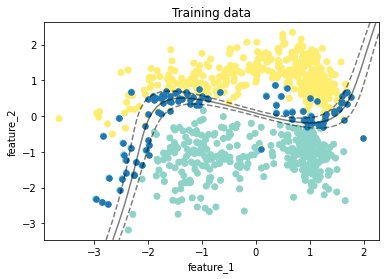

Amount of support vectors: 95, percentage support vectors out of all vectors = 0.127%
Testscore: 0.944
Trainscore: 0.9293333333333333


In [44]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X = random_data_1.drop(columns =['target'])
y = random_data_1['target']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.25, random_state = 11)

clfsig = svm.SVC(kernel = 'sigmoid', C=1)
clfsig.fit(X_train,y_train)

plt.scatter(X_train["feature_1"], X_train["feature_2"], c = y_train, cmap = "Set3")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.title('Training data')
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)

YY, XX = np.meshgrid(yy,xx)

xy = np.vstack([XX.ravel(),YY.ravel()]).T

z = clfsig.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, z, colors = 'k', levels = [-1,0,1],
          alpha = 0.5,
          linestyles = ['--','-','--'])

#Support vectors
ax.scatter(clfsig.support_vectors_[:,0],
          clfsig.support_vectors_[:,1], s=30, linewidth =1, facecolors = None)

plt.show()

part_SV = len(clfsig.support_vectors_)/len(X_train)

print(f"Amount of support vectors: {len(clfsig.support_vectors_)}, percentage support vectors out of all vectors = {part_SV:.3f}%")

print(f"Testscore: {clfsig.score(X_test,y_test)}")
print(f"Trainscore: {clfsig.score(X_train,y_train)}")


## GridsearchCV to find att the best parameters and kernel

The best combination is found to be:'C'=10, 'gamma' = 1, 'kernel' = rbf

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [35]:
X = random_data_1.drop(columns =['target'])
y = random_data_1['target']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.25, random_state = 11)

#Gamma does not affect 'linear' but do affect the other parameters: 'rbf', 'poly','sigmoid'
param_grid = {
    'C': [0.5, 1, 10, 100],
     'kernel': ['linear','poly','rbf','sigmoid'],
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 'auto']
    }


optimal_params = GridSearchCV(SVC(),
                              param_grid,
                              cv = 5,
                              scoring = 'accuracy'
)

optimal_params.fit(X_train, y_train)



df_test = pd.DataFrame.from_dict(optimal_params.cv_results_)

df_test_score = df_test.sort_values(by = ['rank_test_score'])
df_test_score.head()


predictions = optimal_params.predict(X_test)
print(classification_report(y_test,predictions, digits = 4))

print(optimal_params.best_params_)

              precision    recall  f1-score   support

           0     0.9746    0.9350    0.9544       123
           1     0.9394    0.9764    0.9575       127

    accuracy                         0.9560       250
   macro avg     0.9570    0.9557    0.9559       250
weighted avg     0.9567    0.9560    0.9560       250

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


Creating the SVM based on the values from GridSearchCV

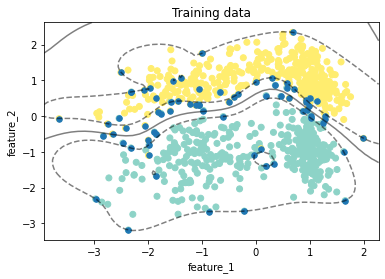

Amount of support vectors: 73, percentage support vectors out of all vectors = 0.097%
Testscore: 0.956
Trainscore: 0.976


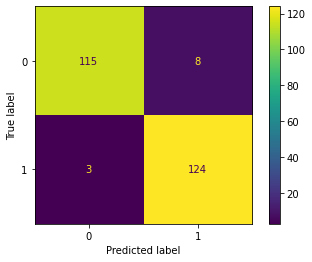

In [42]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X = random_data_1.drop(columns =['target'])
y = random_data_1['target']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.25, random_state = 11)

clfrbf = svm.SVC(kernel = 'rbf', C=10, gamma = 1)
clfrbf.fit(X_train,y_train)

plt.scatter(X_train["feature_1"], X_train["feature_2"], c = y_train, cmap = "Set3")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.title('Training data')
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)

YY, XX = np.meshgrid(yy,xx)

xy = np.vstack([XX.ravel(),YY.ravel()]).T

z = clfrbf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, z, colors = 'k', levels = [-1,0,1],
          alpha = 0.5,
          linestyles = ['--','-','--'])

#Support vectors
ax.scatter(clfrbf.support_vectors_[:,0],
          clfrbf.support_vectors_[:,1], s=30, linewidth =1, facecolors = None)

plt.show()

part_SV = len(clfrbf.support_vectors_)/len(X_train)

print(f"Amount of support vectors: {len(clfrbf.support_vectors_)}, percentage support vectors out of all vectors = {part_SV:.3f}%")

print(f"Testscore: {clfrbf.score(X_test,y_test)}")
print(f"Trainscore: {clfrbf.score(X_train,y_train)}")

predicted_values = clfrbf.predict(X_test)

pred_cm = confusion_matrix(y_test, predicted_values)


cm_disp = ConfusionMatrixDisplay(pred_cm, display_labels = ['0','1'])

cm_disp.plot()

## Plotting testdata of testdata with the hyperplane

The first plot shows a plot of the testdata and in the graph below the prediction of the data is shown. Since the SVM will predict the targets for datapoints below the hyperplane as "0" and above the hyperlane as "1" it is clear which points have been missclassified.

<IPython.core.display.Javascript object>


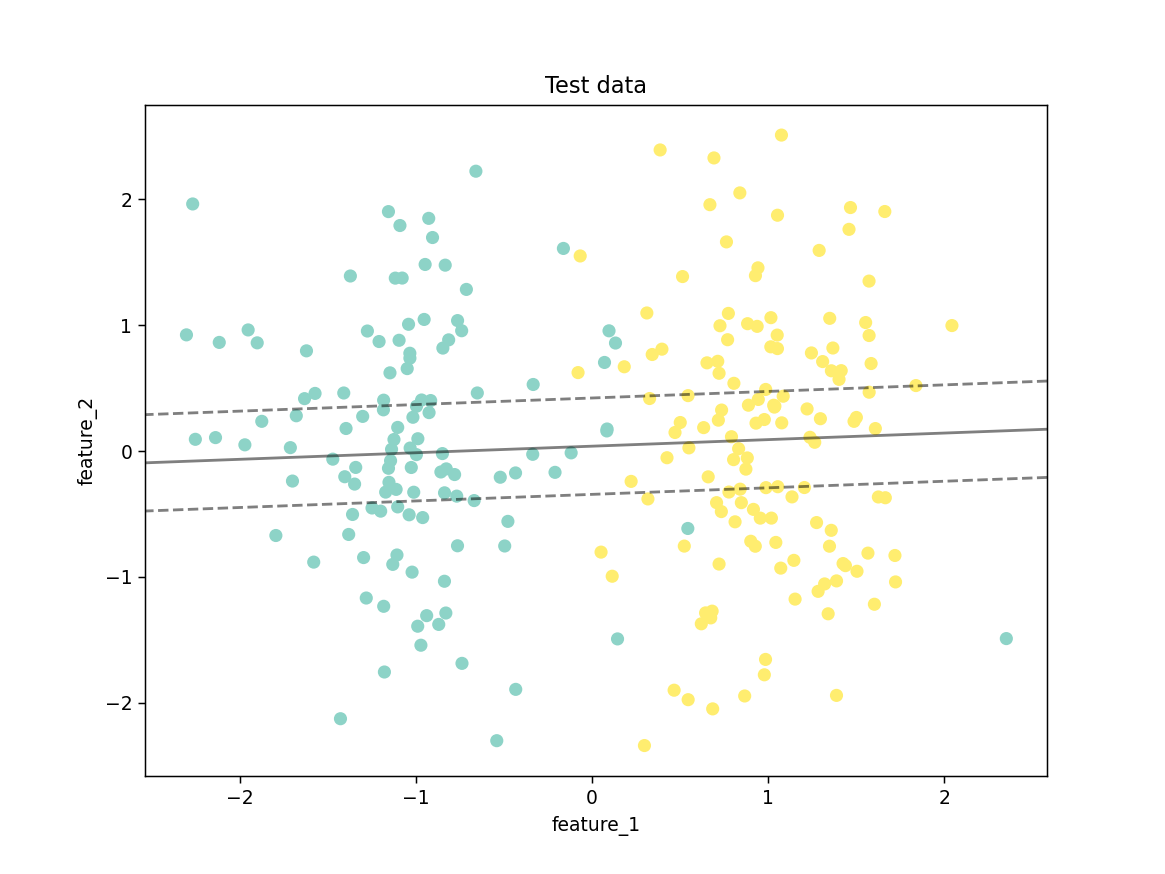

ValueError: X.shape[1] = 3 should be equal to 2, the number of features at training time

In [78]:
#Plotting the testdata
plt.figure()
plt.scatter(X_test["feature_1"], X_test["feature_2"], c = y_test, cmap = "Set3")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.title('Test data')
ax = plt.gca()

#Getting X and Y max and minimum values
xlim = ax.get_xlim()
ylim = ax.get_ylim()

#Creating 50 evenly spaced splits in the Xlim and Ylim range, these will create a grid
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)

#Creating the grid: 50x50 = 2500 points
YY, XX = np.meshgrid(yy,xx)

xy = np.vstack([XX.ravel(),YY.ravel()]).T



z = clf.decision_function(xy).reshape(XX.shape)


ax.contour(XX, YY, z, colors = 'k', levels = [-1,0,1],
          alpha = 0.5,
          linestyles = ['--','-','--'])
plt.show()



predict = clf.predict(X_test)

plt.figure()
plt.scatter(X_test["feature_1"], X_test["feature_2"], c = predict, cmap = "Set3")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.title('Predicited data')
ax = plt.gca()


xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)

YY, XX = np.meshgrid(yy,xx)

xy = np.vstack([XX.ravel(),YY.ravel()]).T


z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, z, colors = 'k', levels = [-1,0,1],
          alpha = 0.5,
          linestyles = ['--','-','--'])


plt.show()

# VG-del

Importing dataset

In [49]:
random_data_3d = pd.read_csv('../../Datasets/random_data_3d.csv')

#### Dataset overview

The dataset is of the size (1000,4). The first 3 columns are features and the fourth is the target value. 

There are no duplicated values or null values in the dataset. 


In [50]:
print(f"Size of dataset: {random_data_3d.shape}")
random_data_3d.head()

Size of dataset: (1000, 4)


,feature_1,feature_2,feature_3,target
0,1.126445,0.978839,-0.618271,1
1,0.312105,1.098053,-0.639979,1
2,-0.820462,-0.402507,-1.084069,0
3,-1.133805,0.688333,-1.082364,0
4,1.129562,0.267780,-1.086351,1


Checking if there are any duplicated values

In [88]:
random_data_3d.duplicated().value_counts()

False    1000
dtype: int64

Checking if the dataset contains any nullvalues.

In [51]:
random_data_3d.isna().sum()

feature_1    0
feature_2    0
feature_3    0
target       0
dtype: int64

target values of data

In [88]:
print(random_data_3d['target'].unique())

[1 0]


In [52]:
feature_1_max_point = random_data_3d.iloc[random_data_3d['feature_1'].idxmax()]
feature_1_min_point = random_data_3d.iloc[random_data_3d['feature_1'].idxmin()]

feature_2_max_point = random_data_3d.iloc[random_data_3d['feature_2'].idxmax()]
feature_2_min_point = random_data_3d.iloc[random_data_3d['feature_2'].idxmin()]

feature_3_max_point = random_data_3d.iloc[random_data_3d['feature_3'].idxmax()]
feature_3_min_point = random_data_3d.iloc[random_data_3d['feature_3'].idxmin()]

print(f"\nFeature_1 max value datapoint:\n{feature_1_max_point}")
print(f"\nFeature_1 min value datapoint:\n{feature_1_min_point}")

print(f"\nFeature_2 max value datapoint:\n{feature_2_max_point}")
print(f"\nFeature_2 min value datapoint:\n{feature_2_min_point}")

print(f"\nFeature_3 max value datapoint:\n{feature_3_max_point}")
print(f"\nFeature_3 min value datapoint:\n{feature_3_min_point}")


Feature_1 max value datapoint:
feature_1    2.365007
feature_2    0.062865
feature_3   -1.817358
target       1.000000
Name: 755, dtype: float64

Feature_1 min value datapoint:
feature_1   -2.458991
feature_2    0.935638
feature_3    1.536435
target       0.000000
Name: 790, dtype: float64

Feature_2 max value datapoint:
feature_1    1.056730
feature_2    2.753076
feature_3   -0.306941
target       1.000000
Name: 887, dtype: float64

Feature_2 min value datapoint:
feature_1   -0.534918
feature_2   -2.718469
feature_3    0.417714
target       0.000000
Name: 183, dtype: float64

Feature_3 max value datapoint:
feature_1    0.368515
feature_2   -0.354382
feature_3    3.362534
target       1.000000
Name: 591, dtype: float64

Feature_3 min value datapoint:
feature_1   -1.686355
feature_2    0.536276
feature_3   -2.374036
target       0.000000
Name: 646, dtype: float64


#### Importing and testing 3d plot

<IPython.core.display.Javascript object>


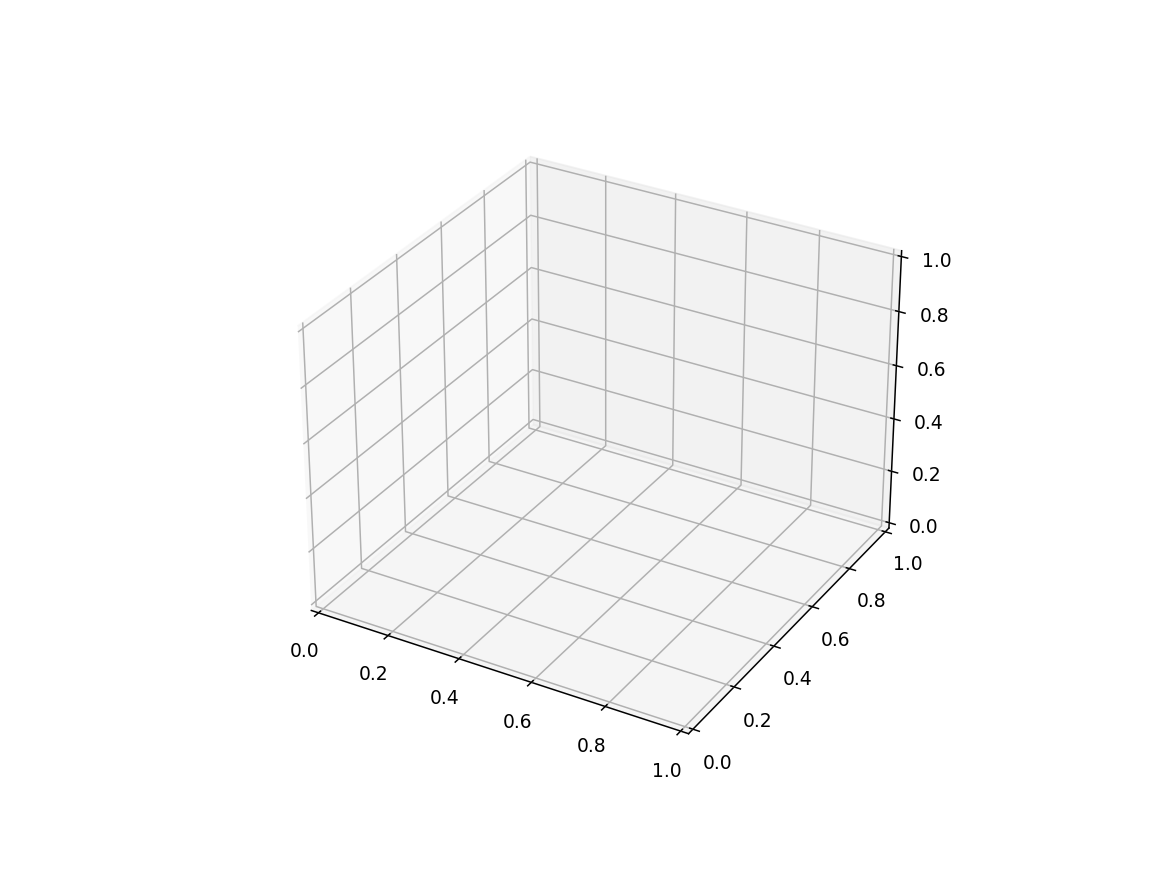

In [53]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection ="3d")

plt.show()

# Creating the 3d model:

By adding <b> %matplotlib notebook </b> the model becoms interactive!

By looking at the 3d-model it is clear that the deciding feature for the target value is feature 1.

<IPython.core.display.Javascript object>


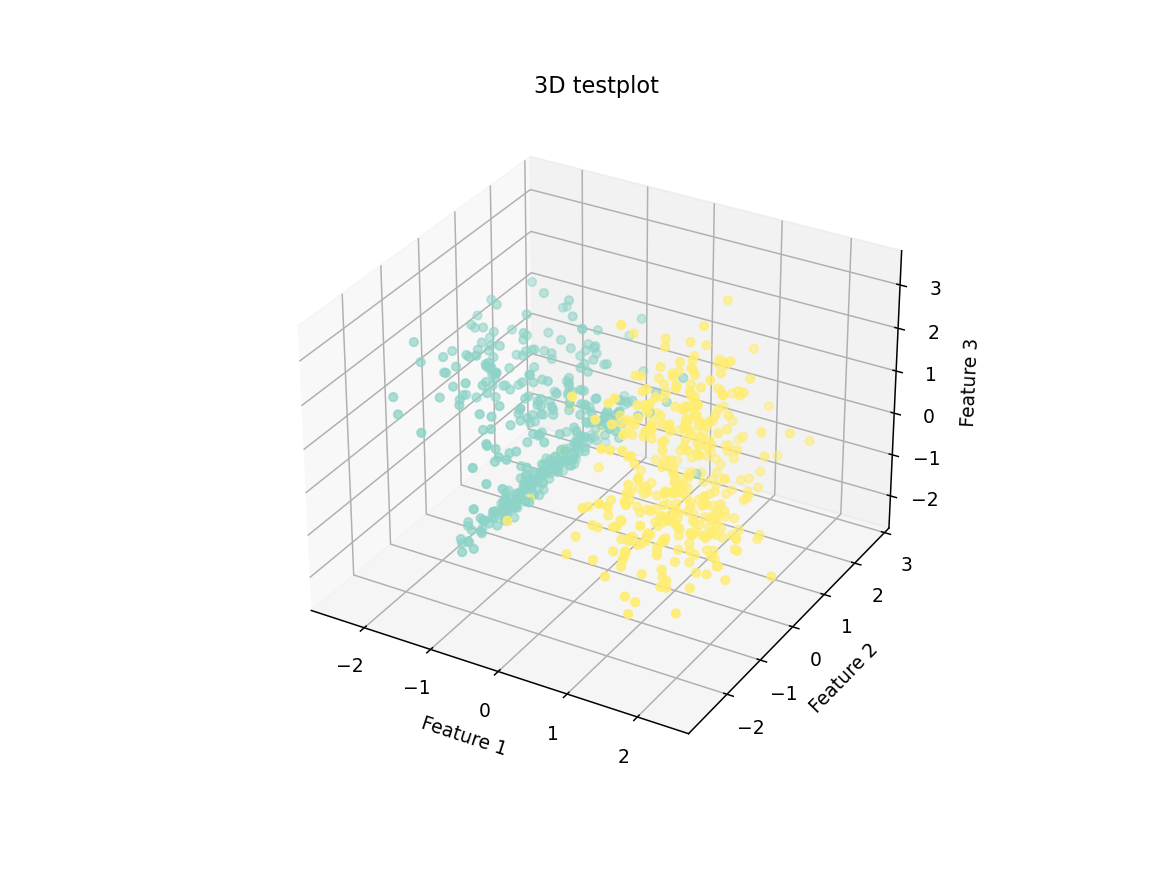

In [54]:
%matplotlib notebook
from sklearn.model_selection import train_test_split

plt.figure()
X = random_data_3d.drop(columns = "target")
y = random_data_3d['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

ax = plt.axes(projection ="3d")
ax.scatter3D(X_train['feature_1'], X_train['feature_2'], X_train['feature_3'], c = y_train, cmap = "Set3")

plt.title("3D testplot")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.show()

# Creating the hyperplane

The best is produced by the "poly" kernel.

## Linear

<IPython.core.display.Javascript object>


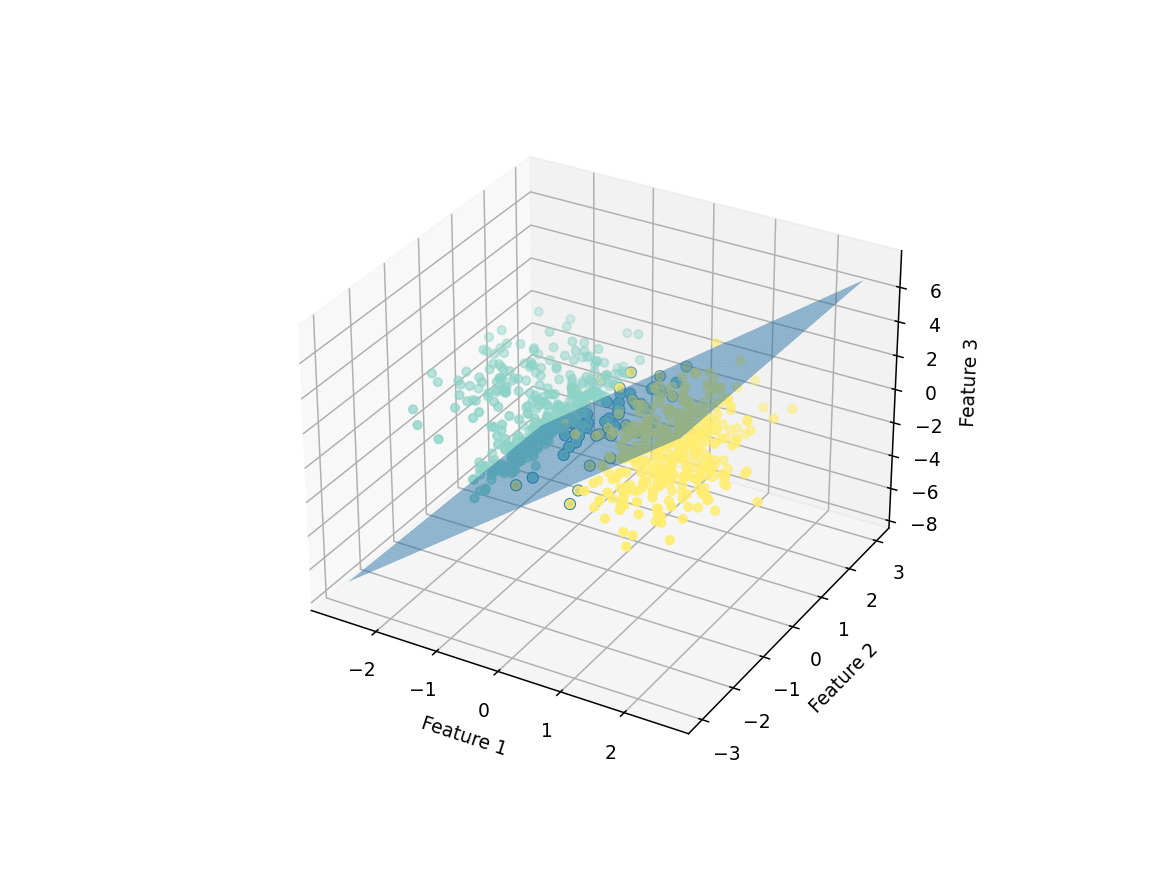

testscore: 0.96


In [91]:
%matplotlib notebook
X = random_data_3d.drop(columns = "target")
y = random_data_3d['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)



ax = plt.axes(projection = "3d")
ax.scatter3D(X_train['feature_1'], X_train['feature_2'], X_train['feature_3'], c = y_train, cmap = "Set3")



clf_3d = svm.SVC(kernel = 'linear', C=1)
clf_3d.fit(X_train,y_train)


xlim = ax.get_xlim()
ylim = ax.get_ylim()
zlim = ax.get_zlim()

# " Antalet punkter i X, Y grid = 2500(50*50)"
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
zz = np.linspace(zlim[0], zlim[1], 2500)



XX, YY = np.meshgrid(xx,yy)

#Converting ZZ to the shape of XX (50,50)
ZZ = np.reshape(zz, XX.shape)

xyz = np.vstack([XX.ravel(),YY.ravel(), ZZ.ravel()]).T


#z returns a value that tells us which side of the hyperplane the point will be.
z = clf_3d.decision_function(xyz).reshape(XX.shape)

#Support vectors
ax.scatter3D(clf_3d.support_vectors_[:,0],
          clf_3d.support_vectors_[:,1], clf_3d.support_vectors_[:,2], s=30, linewidth =1, facecolors = None)


ax.plot_surface(XX, YY, z, alpha = 0.5)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")

plt.show()

part_SV = len(clf.support_vectors_)/len(X_train)

print(f"testscore: {clf_3d.score(X_test,y_test)}")
plt.show()

# rbf

<IPython.core.display.Javascript object>


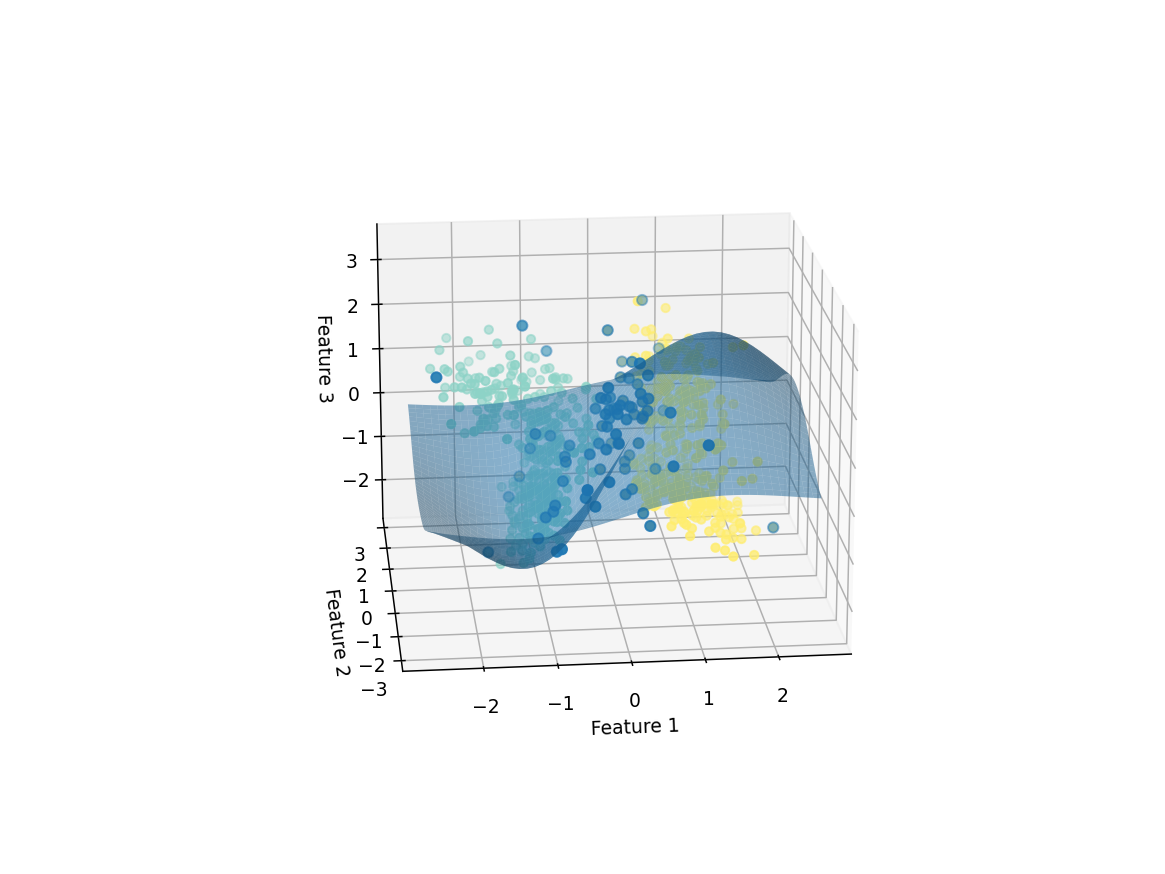

testscore: 0.972


In [93]:
%matplotlib notebook
X = random_data_3d.drop(columns = "target")
y = random_data_3d['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)



ax = plt.axes(projection = "3d")
ax.scatter3D(X_train['feature_1'], X_train['feature_2'], X_train['feature_3'], c = y_train, cmap = "Set3")



clf_3d = svm.SVC(kernel = 'rbf', C=1)
clf_3d.fit(X_train,y_train)


xlim = ax.get_xlim()
ylim = ax.get_ylim()
zlim = ax.get_zlim()

# " Antalet punkter i X, Y grid = 2500(50*50)"
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
zz = np.linspace(zlim[0], zlim[1], 2500)



XX, YY = np.meshgrid(xx,yy)

#Converting ZZ to the shape of XX (50,50)
ZZ = np.reshape(zz, XX.shape)

xyz = np.vstack([XX.ravel(),YY.ravel(), ZZ.ravel()]).T


#z returns a value that tells us which side of the hyperplane the point will be.
z = clf_3d.decision_function(xyz).reshape(XX.shape)

#Support vectors
ax.scatter3D(clf_3d.support_vectors_[:,0],
          clf_3d.support_vectors_[:,1], clf_3d.support_vectors_[:,2], s=30, linewidth =1, facecolors = None)


ax.plot_surface(XX, YY, z, alpha = 0.5)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")

plt.show()

part_SV = len(clf.support_vectors_)/len(X_train)

print(f"testscore: {clf_3d.score(X_test,y_test)}")
plt.show()

# sigmoid
The scale is different here and gives a more flat visualization of the data.

<IPython.core.display.Javascript object>


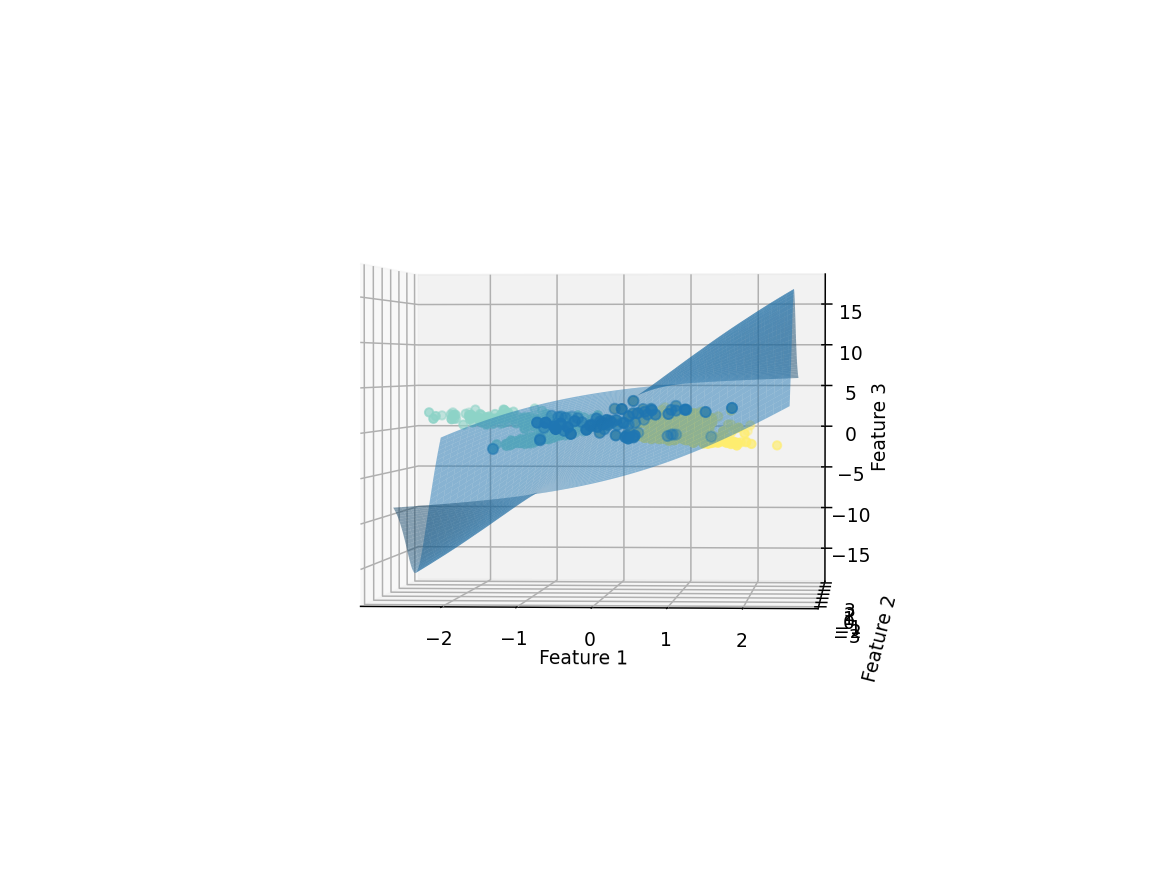

testscore: 0.9


In [94]:
%matplotlib notebook
X = random_data_3d.drop(columns = "target")
y = random_data_3d['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)



ax = plt.axes(projection = "3d")
ax.scatter3D(X_train['feature_1'], X_train['feature_2'], X_train['feature_3'], c = y_train, cmap = "Set3")



clf_3d = svm.SVC(kernel = 'sigmoid', C=1)
clf_3d.fit(X_train,y_train)


xlim = ax.get_xlim()
ylim = ax.get_ylim()
zlim = ax.get_zlim()

# " Antalet punkter i X, Y grid = 2500(50*50)"
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
zz = np.linspace(zlim[0], zlim[1], 2500)



XX, YY = np.meshgrid(xx,yy)

#Converting ZZ to the shape of XX (50,50)
ZZ = np.reshape(zz, XX.shape)

xyz = np.vstack([XX.ravel(),YY.ravel(), ZZ.ravel()]).T


#z returns a value that tells us which side of the hyperplane the point will be.
z = clf_3d.decision_function(xyz).reshape(XX.shape)

#Support vectors
ax.scatter3D(clf_3d.support_vectors_[:,0],
          clf_3d.support_vectors_[:,1], clf_3d.support_vectors_[:,2], s=30, linewidth =1, facecolors = None)


ax.plot_surface(XX, YY, z, alpha = 0.5)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")

plt.show()

part_SV = len(clf.support_vectors_)/len(X_train)

print(f"testscore: {clf_3d.score(X_test,y_test)}")
plt.show()

# Poly

<IPython.core.display.Javascript object>


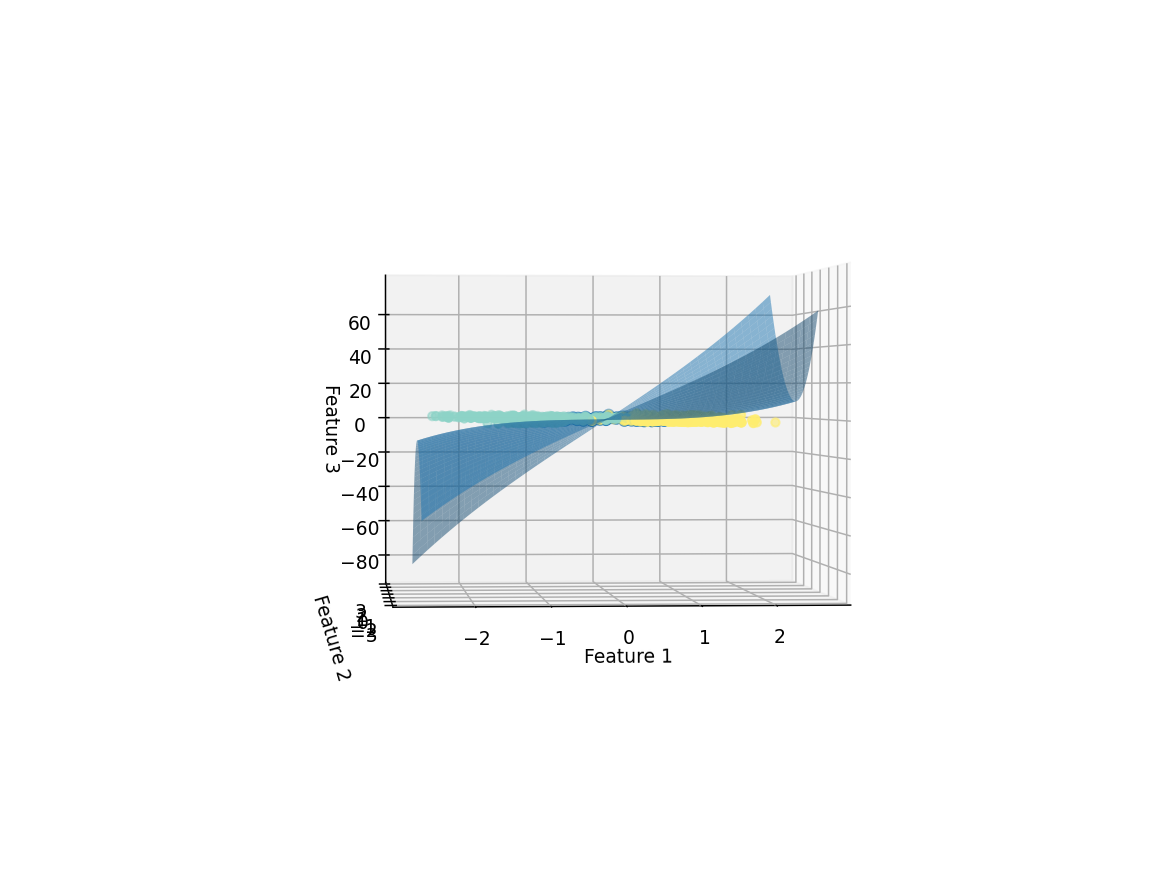

testscore: 0.98


In [98]:
%matplotlib notebook
X = random_data_3d.drop(columns = "target")
y = random_data_3d['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)



ax = plt.axes(projection = "3d")
ax.scatter3D(X_train['feature_1'], X_train['feature_2'], X_train['feature_3'], c = y_train, cmap = "Set3")



clf_3d = svm.SVC(kernel = 'poly', C=1)
clf_3d.fit(X_train,y_train)


xlim = ax.get_xlim()
ylim = ax.get_ylim()
zlim = ax.get_zlim()

# " Antalet punkter i X, Y grid = 2500(50*50)"
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
zz = np.linspace(zlim[0], zlim[1], 2500)



XX, YY = np.meshgrid(xx,yy)

#Converting ZZ to the shape of XX (50,50)
ZZ = np.reshape(zz, XX.shape)

xyz = np.vstack([XX.ravel(),YY.ravel(), ZZ.ravel()]).T


#z returns a value that tells us which side of the hyperplane the point will be.
z = clf_3d.decision_function(xyz).reshape(XX.shape)

#Support vectors
ax.scatter3D(clf_3d.support_vectors_[:,0],
          clf_3d.support_vectors_[:,1], clf_3d.support_vectors_[:,2], s=30, linewidth =1, facecolors = None)


ax.plot_surface(XX, YY, z, alpha = 0.5)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")


plt.show()

part_SV = len(clf.support_vectors_)/len(X_train)

print(f"testscore: {clf_3d.score(X_test,y_test)}")
plt.show()